In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('final_data1.csv')
df.head()

,Aggravated Assault,Bachelor's Degree,Police Expenditure Per Capita,Population in Millions,Population Density (Persons/Sq Mile),Unemployment Rate
0,521,18308,185,4.041,79.6,7.2
1,367,1148,600,0.550,1.0,8.5
2,443,18068,372,3.665,32.3,5.7
3,365,7729,142,2.351,45.1,7.3
4,614,100484,432,29.760,190.8,7.5


In [2]:
df.tail()

,Aggravated Assault,Bachelor's Degree,Police Expenditure Per Capita,Population in Millions,Population Density (Persons/Sq Mile),Unemployment Rate
45,188,28960,260,6.187,156.3,5.8
46,303,19201,261,4.867,73.1,6.3
47,102,7533,118,1.793,74.5,10.5
48,127,26343,268,4.892,90.1,5.4
49,251,1641,300,0.454,4.7,5.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Aggravated Assault                    50 non-null     int64  
 1   Bachelor's Degree                     50 non-null     int64  
 2   Police Expenditure Per Capita         50 non-null     int64  
 3   Population in Millions                50 non-null     float64
 4   Population Density (Persons/Sq Mile)  50 non-null     float64
 5   Unemployment Rate                     50 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.5 KB


In [4]:
df.tail()

,Aggravated Assault,Bachelor's Degree,Police Expenditure Per Capita,Population in Millions,Population Density (Persons/Sq Mile),Unemployment Rate
45,188,28960,260,6.187,156.3,5.8
46,303,19201,261,4.867,73.1,6.3
47,102,7533,118,1.793,74.5,10.5
48,127,26343,268,4.892,90.1,5.4
49,251,1641,300,0.454,4.7,5.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Aggravated Assault                    50 non-null     int64  
 1   Bachelor's Degree                     50 non-null     int64  
 2   Police Expenditure Per Capita         50 non-null     int64  
 3   Population in Millions                50 non-null     float64
 4   Population Density (Persons/Sq Mile)  50 non-null     float64
 5   Unemployment Rate                     50 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.5 KB


In [6]:
df.describe()

,Aggravated Assault,Bachelor's Degree,Police Expenditure Per Capita,Population in Millions,Population Density (Persons/Sq Mile),Unemployment Rate
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,331.920000,21667.540000,261.700000,4.962040,166.124000,6.366000
std,172.914021,21906.102596,93.757449,5.459782,235.156857,1.536177
min,47.000000,1148.000000,118.000000,0.454000,1.000000,2.700000
25%,204.000000,7229.250000,191.250000,1.299750,31.925000,5.550000
50%,307.000000,15469.500000,240.000000,3.390500,77.050000,6.500000
75%,441.000000,25986.500000,302.250000,5.898000,170.275000,7.200000
max,764.000000,100484.000000,600.000000,29.760000,1042.000000,10.500000


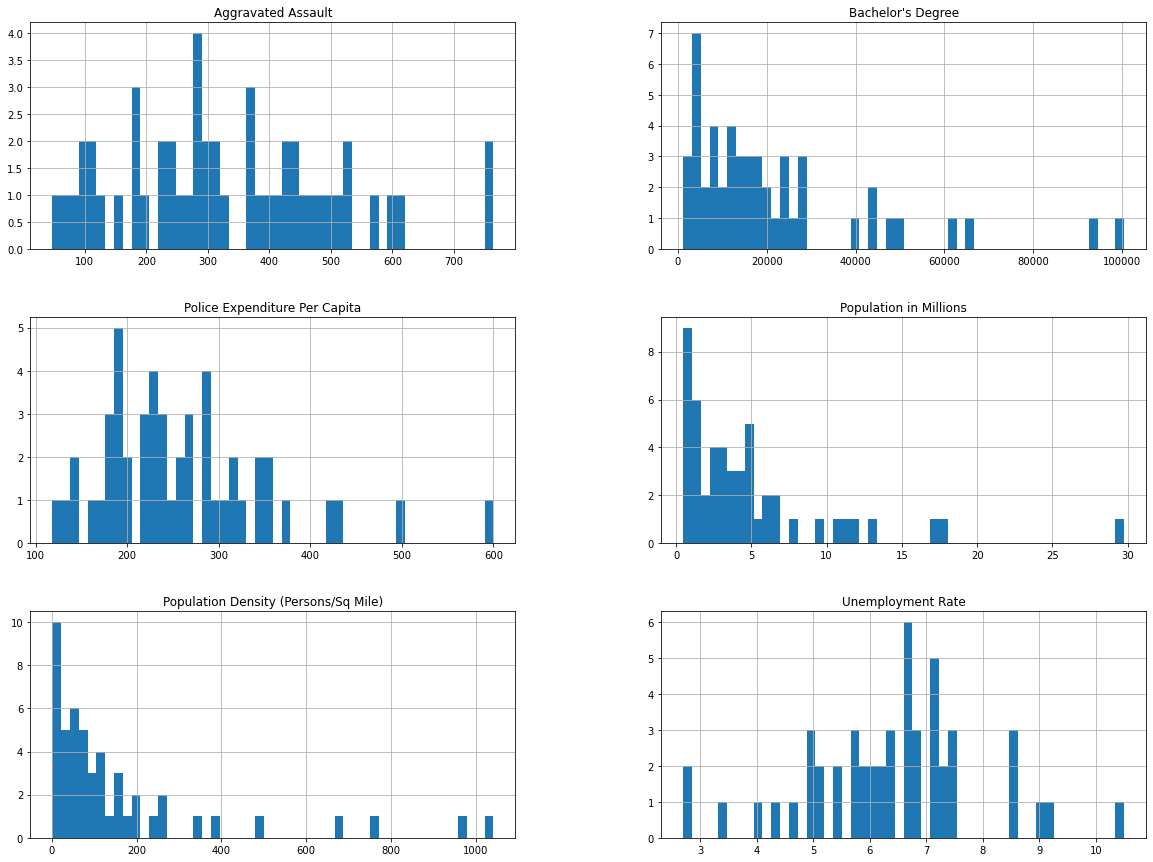

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [8]:
corr_matrix = df.corr()
corr_matrix["Aggravated Assault"].sort_values(ascending=False)

Aggravated Assault                      1.000000
Population in Millions                  0.485449
Bachelor's Degree                       0.431372
Police Expenditure Per Capita           0.394529
Unemployment Rate                       0.248305
Population Density (Persons/Sq Mile)    0.159105
Name: Aggravated Assault, dtype: float64

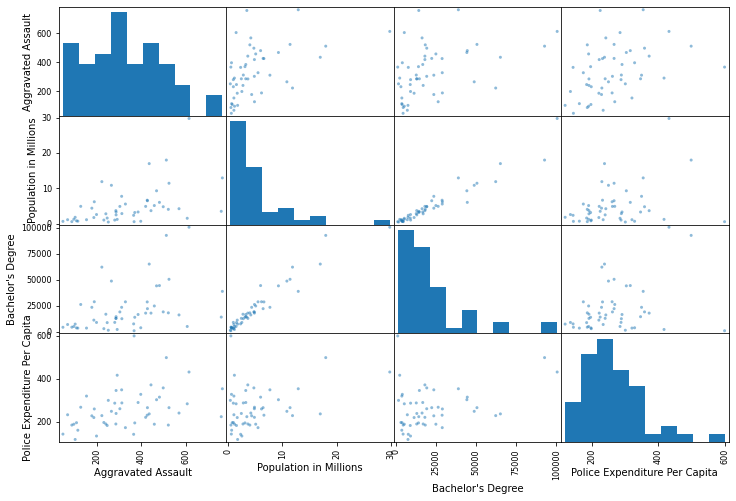

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["Aggravated Assault", "Population in Millions", "Bachelor's Degree", "Police Expenditure Per Capita"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

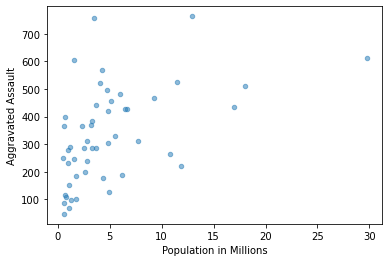

In [10]:
df.plot(kind="scatter", x="Population in Millions", y="Aggravated Assault", alpha=0.5)
plt.savefig('scatter.png')

In [11]:
X = df.loc[:, df.columns != 'Aggravated Assault']
Y = df.loc[:, df.columns == 'Aggravated Assault']

In [12]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
model = sm.OLS(Y,X1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Aggravated Assault   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     4.280
Date:                Sat, 11 Mar 2023   Prob (F-statistic):            0.00294
Time:                        19:05:43   Log-Likelihood:                -318.17
No. Observations:                  50   AIC:                             648.3
Df Residuals:                      44   BIC:                             659.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Aggravated Assault   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     4.280
Date:                Sat, 11 Mar 2023   Prob (F-statistic):            0.00294
Time:                        19:05:43   Log-Likelihood:                -318.17
No. Observations:                  50   AIC:                             648.3
Df Residuals:                      44   BIC:                             659.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   57.9555    108.790      0.533      0.597    -161.297     277.208
Bachelor's Degree                       -0.0035      0.004     -1.007      0.320      -0.011       0.004
Police Expenditure Per Capita            0.4644      0.254      1.832      0.074      -0.047       0.975
Population in Millions                  25.2377     14.117      1.788      0.081      -3.214      53.689
Population Density (Persons/Sq Mile)    -0.0086      0.102     -0.084      0.933      -0.213       0.196
Unemployment Rate                       16.5579     14.800      1.119      0.269     -13.269      46.384
==============================================================================
Omnibus:                        7.223   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.200
Skew:                           0.797   Prob(JB):                       0.0451
Kurtosis:                       3.657   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
logreg = LinearRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
lin_mse = mean_squared_error(Y,Y_pred)
lin_rmse = np.sqrt(lin_mse)
print('Standard Error of the Estimates (SEy): %.4f' % lin_rmse)

Standard Error of the Estimates (SEy): 140.4048


In [15]:
Y_pred = logreg.predict(X)
df1 = df.copy()
df1.drop(["Bachelor's Degree", 'Police Expenditure Per Capita', 'Population in Millions', 'Population Density (Persons/Sq Mile)', 'Unemployment Rate'],axis=1,inplace=True)
df1.rename(columns={"Aggravated Assault": "Actual (Y)"},inplace=True)
df1['Forecast (F)']=Y_pred
df1['Error (E)']=df1['Actual (Y)'] - df1['Forecast (F)']
df1.head()

,Actual (Y),Forecast (F),Error (E)
0,521,299.512396,221.487604
1,367,487.124330,-120.124330
2,443,353.278923,89.721077
3,365,276.329567,88.670433
4,614,776.133570,-162.133570


In [16]:
df1.tail()

,Actual (Y),Forecast (F),Error (E)
45,188,326.918070,-138.918070
46,303,337.640178,-34.640178
47,102,304.530073,-202.530073
48,127,301.167091,-174.167091
49,251,287.314923,-36.314923


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


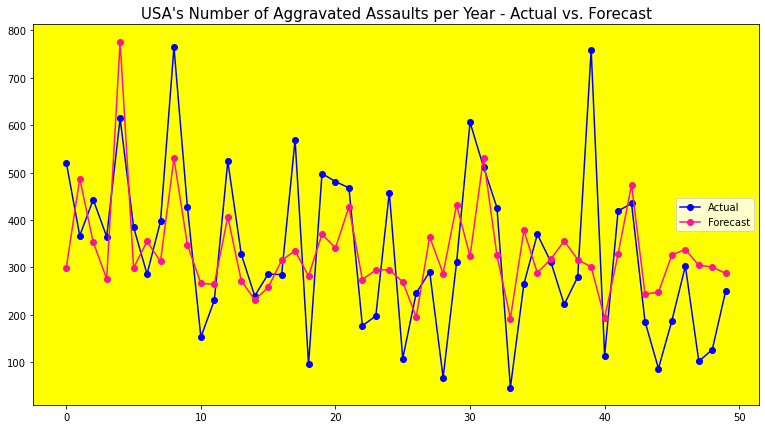

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fontsize=15
plt.figure(figsize=(13,7))
plt.title("USA's Number of Aggravated Assaults per Year - Actual vs. Forecast",fontsize=fontsize)
ax = plt.axes()
ax.set_facecolor("yellow")
Actual = np.array(df1['Actual (Y)'])
Forecast = np.array(df1['Forecast (F)'])
plt.plot(Actual, marker = 'o', color="blue", label="Actual")
plt.plot(Forecast,marker = 'o', color="deeppink", label="Forecast")
plt.legend(loc="center right")
plt.show()